In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_curve,recall_score,precision_score,f1_score,roc_curve

In [2]:
data_frame = pd.read_csv('diabetes.csv')

In [3]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_frame.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data_frame['Outcome'].value_counts()

0    495
1    266
Name: Outcome, dtype: int64

In [6]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,3.831800,120.926413,69.105125,20.515112,80.149803,31.993955,0.473635,33.197109,0.349540
std,3.363205,32.024536,19.437470,15.948770,115.528846,7.895603,0.332228,11.740194,0.477138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data_frame.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.276768,110.028283,68.165657,19.602020,68.896970,30.309697,0.431624,31.149495
1,4.864662,141.206767,70.853383,22.214286,101.090226,35.128195,0.551812,37.007519


In [8]:
X = data_frame.drop(columns='Outcome',axis=1)

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
Y = data_frame['Outcome']

In [11]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
standardized_Data = scaler.fit_transform(X)

In [14]:
standardized_Data

array([[ 0.64510667,  0.8459574 ,  0.14903066, ...,  0.20354379,
         0.46193066,  1.43216902],
       [-0.8425484 , -1.12257804, -0.1598545 , ..., -0.68360871,
        -0.36937117, -0.18726727],
       [ 1.24016869,  1.9395882 , -0.26281622, ..., -1.10183775,
         0.597469  , -0.10203378],
       ...,
       [-0.8425484 , -0.46639956,  0.3549541 , ...,  0.69781448,
        -0.8332135 , -0.61343472],
       [ 0.64510667,  2.15831436,  1.17864786, ...,  0.44434233,
        -0.58924448,  2.79590485],
       [-0.54501739, -1.02883826, -0.57170137, ..., -0.45548378,
         0.88059354, -0.95436868]])

In [15]:
X = standardized_Data

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,shuffle=True,random_state=35)

In [17]:
print("Test Data Size: ",'%.2f'% (len(Y_test)/len(Y)))

Test Data Size:  0.10


In [18]:
print("Train Data Size: ",'%.2f'% (len(Y_train)/len(Y)))

Train Data Size:  0.90


In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [21]:
train_pred = classifier.predict(X_train)
train_acc_score = accuracy_score(Y_train,train_pred)
print(train_acc_score)

0.7748538011695907


In [22]:
test_pred = classifier.predict(X_test)
test_acc_score = accuracy_score(Y_test,test_pred)
print(test_acc_score)

0.7662337662337663


In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, test_pred)
cnf_matrix

array([[41,  9],
       [ 9, 18]], dtype=int64)

In [24]:
print("False Negatives: " + str(cnf_matrix[1][0]))
print("False Positives: " + str(cnf_matrix[0][1]))

print("True Negatives: " + str(cnf_matrix[0][0]))
print("True Positives: " + str(cnf_matrix[1][1]))

False Negatives: 9
False Positives: 9
True Negatives: 41
True Positives: 18


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 355.0, 'Predicted label')

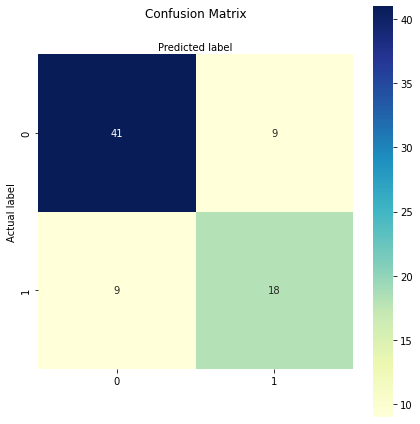

In [26]:
import seaborn as sns
class_names=['D','ND'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",'%.4f' % metrics.accuracy_score(Y_test, test_pred))
print("Precision:",'%.4f' %metrics.precision_score(Y_test, test_pred))
print("Recall:",'%.4f' %metrics.recall_score(Y_test, test_pred))
print("F1 Score:",'%.4f' %metrics.f1_score(Y_test, test_pred))

Accuracy: 0.7662
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667


In [28]:
test_data = pd.read_csv('test.csv')

In [29]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,170,74,31,0,44.0,0.403,43,1
1,9,89,62,0,0,22.5,0.142,33,0
2,7,100,0,0,0,30.0,0.484,32,1
3,5,121,72,23,112,26.2,0.245,30,0
4,1,126,60,0,0,30.1,0.349,47,1


In [30]:
x_unknown = test_data.drop(columns='Outcome',axis=1)

In [31]:
x_test_data = scaler.fit_transform(x_unknown)

In [32]:
for i in range(len(x_test_data)):
    test_input = x_test_data[i]
    test_input = np.asarray(test_input)
    test_input = test_input.reshape(1,-1)
    prediction = classifier.predict(test_input)
    print(prediction)

    if prediction[0] == 1:
        print("The patient is Diebetic")
    else:
        print("The patient is Not Diebetic")

[1]
The patient is Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic
[1]
The patient is Diebetic
[1]
The patient is Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic
[0]
The patient is Not Diebetic


In [33]:
# sns.pairplot(data=data_frame,hue='Outcome')